[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
Iris 1 is a ['setosa']
Iris 2 is a ['setosa']
-----------------LASSO---------------------
training set score: 0.464937
test set score: 0.430838
number of features used: 4
---------------SVC AND LOGISTIC REGRESSION-----------


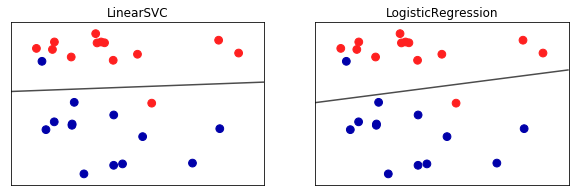

----------Multi-Class Uncertainty-------
(38, 3)
[[-0.50692424 -0.53347791  1.53022838]
 [-0.51151707  1.50574741 -0.48234855]
 [ 1.51897822 -0.53079866 -0.48146442]
 [-0.50756256 -0.53347791  1.53022838]
 [ 1.51897822 -0.53079866 -0.48146442]
 [-0.50985911 -0.53347791  1.53022838]]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[[ 0.10370714  0.10098957  0.79530329]
 [ 0.10474133  0.7874172   0.10784147]
 [ 0.79111482  0.10186682  0.10701837]
 [ 0.10364782  0.10099625  0.79535593]
 [ 0.79111482  0.10186682  0.10701837]
 [ 0.10343465  0.10102027  0.79554508]]


In [2]:
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import IPython
import sklearn
from sklearn.datasets import load_iris
iris=load_iris()

print (iris['target'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris['data'], iris['target'], random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

print (knn.fit(X_train, y_train))
X_new=np.array([[4.9,2.9,1,0.2]])
X_new.shape

X_new2=np.array([[5,3,2,0.5]])
X_new2.shape
prediction=knn.predict(X_new2)
prediction2=knn.predict(X_new)

print ("Iris 1 is a " +str(iris['target_names'][prediction]))
print ("Iris 2 is a " +str(iris['target_names'][prediction2]))

y_pred=knn.predict(X_test)
np.mean(y_pred==y_test)
print("-----------------LASSO---------------------")
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 3))


print ("---------------SVC AND LOGISTIC REGRESSION-----------")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y=mglearn.datasets.make_forge()

fig, axes= plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)
plt.show()

print ("----------Multi-Class Uncertainty-------")
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
                max_depth=3, max_features=None, max_leaf_nodes=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100,
                presort='auto', random_state=0, subsample=1.0, verbose=0,
                warm_start=False)
print(gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print(gbrt.decision_function(X_test)[:6, :])
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print(gbrt.predict(X_test))
# show the first few entries of predict_proba
print(gbrt.predict_proba(X_test)[:6])